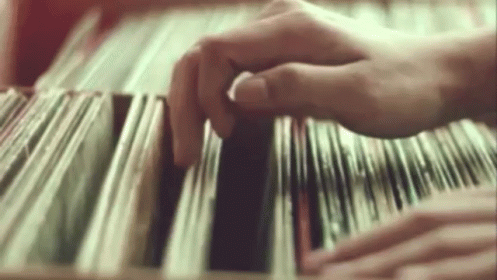

## BATCH FILE RENAMING 📂

In [44]:
#import relevant libraries
import ipywidgets as widgets
import os as os
import shutil as sh
from datetime import datetime
from IPython.display import display

In [45]:
#define variables

path_widget = widgets.Text(value='path/to/folder', description='Folder:')
prefix_widget = widgets.Text(value='XXX', description='Prefix:')
suffix_widget = widgets.Text(value='XXX', description='Suffix:')

display(path_widget, prefix_widget, suffix_widget)

Text(value='path/to/folder', description='Folder:')

Text(value='XXX', description='Prefix:')

Text(value='XXX', description='Suffix:')

In [43]:
source_path = path_widget.value
preview_path = os.path.join(source_path, 'preview_folder')
button_preview = widgets.Button(description='create preview folder:')


In [42]:
#define path for source folder and preview folder 
button_preview = widgets.Button(description='create preview folder:')
    
#create a test folder to preview the changes
def on_click_preview(b):
    global source_path, preview_path
    source_path = path_widget.value
    preview_path = os.path.join(source_path, 'preview_folder')

    os.makedirs(preview_path, exist_ok=True)
    if os.path.exists(preview_path):
        sh.rmtree(preview_path)

    #copy contents of source folder into test folder
    sh.copytree(source_path,preview_path)

In [32]:
display(button_preview)
button_preview.on_click(on_click_preview)

Button(description='create preview folder:', style=ButtonStyle())

## Update file names 👆

In [46]:
prefix = prefix_widget.value
suffix = suffix_widget.value
button_update = widgets.Button(description='update file names:')

#prefix
def batch_update(folder):
    
    global prefix, suffix, date, button_update
    prefix = prefix_widget.value
    suffix = suffix_widget.value
        
    for file in os.listdir(folder):
        if os.path.isfile(os.path.join(folder, file)):
            base_name, extension = os.path.splitext(file)
            new_name = f'{prefix}_{base_name}_{suffix}{extension}'
            os.rename(os.path.join(folder, file), os.path.join(folder, new_name))
    
def on_click_update(b):
    batch_update(preview_path)

In [39]:
button_update.on_click(on_click_update)
display(button_update)

Button(description='update file names:', style=ButtonStyle())

## Execute in main folder ⚠️

In [40]:
button_execute = widgets.Button(description='execute changes in main folder:')

def on_click_execute(b):
    batch_update(source_path)

    if os.path.exists(preview_path):
        sh.rmtree(preview_path)

In [41]:
button_execute.on_click(on_click_execute)
display(button_execute)

Button(description='execute changes in main folder:', style=ButtonStyle())